<a href="https://colab.research.google.com/github/jmvazqueznicolas/AI_and_DS_Tec2023/blob/main/Metrics_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Metrics

## Mean Squared Error (MSE)


In [14]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
data = load_diabetes()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Create models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Train the models and compute MSE
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse:.2f}")

Linear Regression - Mean Squared Error: 2900.19
Ridge - Mean Squared Error: 3077.42
Random Forest - Mean Squared Error: 2952.01


## Mean Absolute Error (MAE)

Linear Regression: MAE = 52.26
Ridge: MAE = 55.96
Lasso: MAE = 54.28


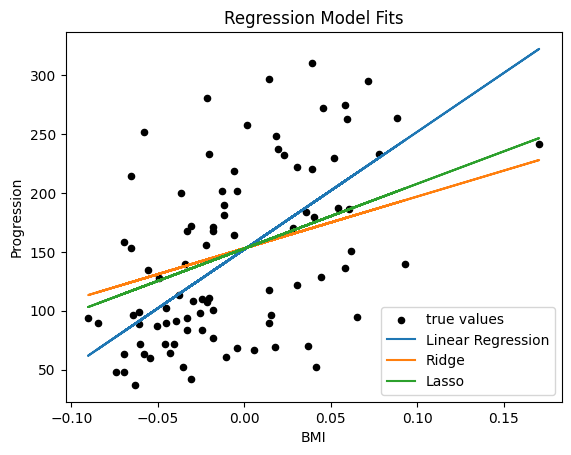

In [15]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Importing various regression models
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso, LinearRegression, Ridge

# Load the diabetes dataset
X = data.data[:, np.newaxis, 2]  # Using only the 'bmi' feature
y = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary of different regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
}

# Plot the true data points (using scatter function)
plt.scatter(X_test, y_test, color='black', s=20, marker='o', label='true values')

# Plot model predictions
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    predictions = model.predict(X_test)  # Make predictions

    plt.plot(X_test, predictions, label=name) #Using plot function

    # Print MAE for each model
    mae = mean_absolute_error(y_test, predictions)
    print(f"{name}: MAE = {mae:.2f}")

plt.xlabel('BMI')
plt.ylabel('Progression')
plt.title('Regression Model Fits')
plt.legend()
plt.show()

## Root Mean Squared Error (RMSE)


Linear Regression RMSE: 62.33
Decision Tree RMSE: 68.98
Random Forest RMSE: 66.05


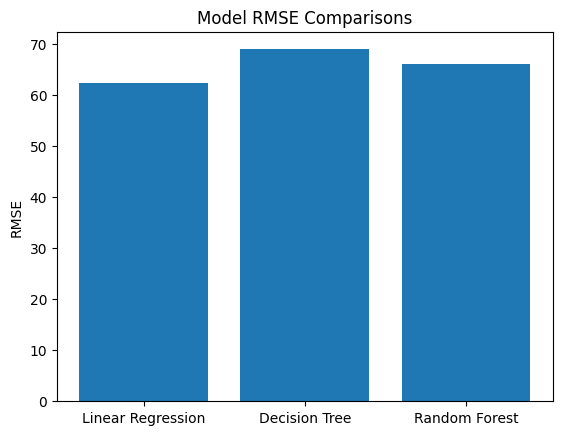

In [16]:
# Importing various regression models
from sklearn.tree import DecisionTreeRegressor

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a list of regression models
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42))
]

rmse_scores = []

# Train each model and calculate RMSE
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_scores.append((name, rmse))
    print(f'{name} RMSE: {rmse:.2f}')

# Plotting
names, scores = zip(*rmse_scores)
plt.bar(names, scores)
plt.ylabel('RMSE')
plt.title('Model RMSE Comparisons')
plt.show()


## Coefficient of Determination R²


Linear Regression R^2 Score: 0.28
Decision Tree R^2 Score: 0.12
Random Forest R^2 Score: 0.19


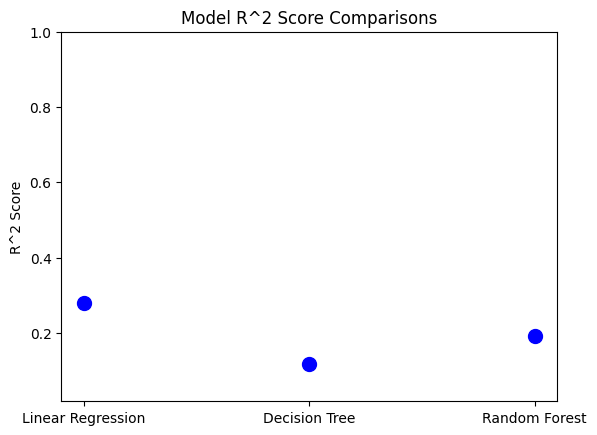

In [17]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a list of regression models
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42))
]

r2_scores = []

# Train each model and calculate R^2 score
for name, model in models:
    model.fit(X_train, y_train)
    r2 = model.score(X_test, y_test)
    r2_scores.append((name, r2))
    print(f'{name} R^2 Score: {r2:.2f}')

# Plotting
names, scores = zip(*r2_scores)
plt.scatter(names, scores, color='blue', s=100)  # Scatter plot
plt.axhline(0, color='red', linestyle='--')  # Draw a horizontal line at R^2 = 0
plt.ylabel('R^2 Score')
plt.title('Model R^2 Score Comparisons')
plt.ylim(min(scores) - 0.1, 1)  # Setting the y-axis limits to be slightly below the minimum R^2 score and up to 1
plt.show()


## Mean Absolute Percentage Error (MAPE)


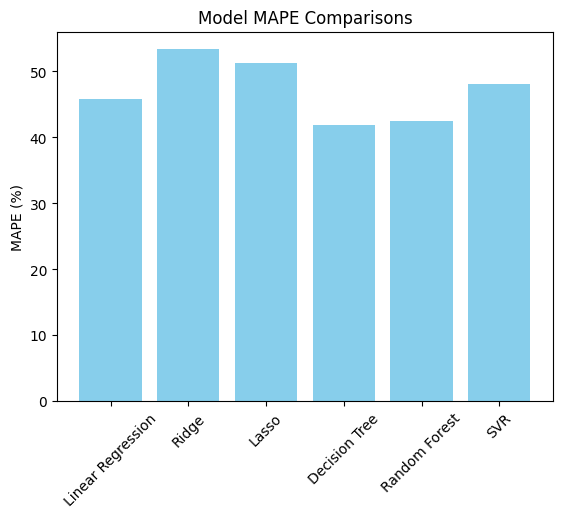

In [18]:
# Importing various regression models
from sklearn.svm import SVR

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_indices = y_true != 0  # Avoid division by zero
    return np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100

# List of models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('SVR', SVR())
]

mape_scores = []

# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, predictions)
    mape_scores.append((name, mape))

# Plotting
names, scores = zip(*mape_scores)
plt.bar(names, scores, color='skyblue')
plt.ylabel('MAPE (%)')
plt.title('Model MAPE Comparisons')
plt.xticks(rotation=45)
plt.show()


## Root Mean Squared Logarithmic Error (RMSLE)


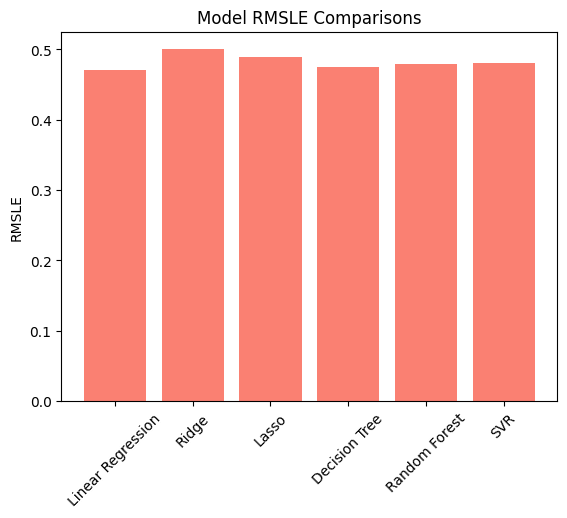

In [19]:
# Import necessary libraries
import numpy as np
from sklearn.metrics import mean_squared_log_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define RMSLE function
def root_mean_squared_log_error(y_true, y_pred):
    # Ensure predictions are positive (clip at a very small positive value)
    y_pred = np.clip(y_pred, 1e-10, np.inf)
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# List of models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('SVR', SVR())
]

rmsle_scores = []

# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmsle = root_mean_squared_log_error(y_test, predictions)
    rmsle_scores.append((name, rmsle))

# Plotting
names, scores = zip(*rmsle_scores)
plt.bar(names, scores, color='salmon')
plt.ylabel('RMSLE')
plt.title('Model RMSLE Comparisons')
plt.xticks(rotation=45)
plt.show()

